<a href="https://colab.research.google.com/github/oldgreg07/Journey-to-the-Center-of-Python/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2022/07-Data%20Visualizations/03-Yearly%20Fantasy%20Stats%20-%202021.csv')

In [170]:
import pandas as pd; pd.set_option('display.max_columns', None)
import seaborn as sns
from matplotlib import pyplot as plt

In [171]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2022/07-Data%20Visualizations/03-Yearly%20Fantasy%20Stats%20-%202021.csv').iloc[:, 1:]

df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,Jonathan Taylor*+,IND,RB,22,17,17,51.0,40.0,0.0,0.0,0.0,1811.0,18.0,332.0,360.0,2.0,333.0,0.0,4.0,2.0
1,Cooper Kupp*+,LAR,WR,28,17,17,191.0,145.0,0.0,0.0,1.0,18.0,0.0,4.0,1947.0,16.0,295.0,0.0,0.0,0.0
2,Deebo Samuel*+,SFO,WR,25,16,15,121.0,77.0,24.0,1.0,2.0,365.0,8.0,59.0,1405.0,6.0,262.0,0.0,4.0,2.0
3,Josh Allen,BUF,QB,25,17,17,0.0,0.0,4407.0,36.0,646.0,763.0,6.0,122.0,0.0,0.0,403.0,15.0,8.0,3.0
4,Austin Ekeler,LAC,RB,26,16,16,94.0,70.0,0.0,0.0,0.0,911.0,12.0,206.0,647.0,8.0,274.0,0.0,4.0,3.0


In [172]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         671 non-null    object 
 1   Tm             671 non-null    object 
 2   Pos            596 non-null    object 
 3   Age            671 non-null    int64  
 4   G              671 non-null    int64  
 5   GS             671 non-null    int64  
 6   Tgt            670 non-null    float64
 7   Rec            670 non-null    float64
 8   PassingYds     670 non-null    float64
 9   PassingTD      670 non-null    float64
 10  PassingAtt     670 non-null    float64
 11  RushingYds     670 non-null    float64
 12  RushingTD      670 non-null    float64
 13  RushingAtt     670 non-null    float64
 14  ReceivingYds   670 non-null    float64
 15  ReceivingTD    670 non-null    float64
 16  FantasyPoints  581 non-null    float64
 17  Int            670 non-null    float64
 18  Fumbles   

In [173]:
pd.set_option('chained_assignment', None)

In [174]:
fantasy_scoring_weights = {
    'RushingYds': 0.1,
    'ReceivingYds': 0.1,
    'RushingTD': 6,
    'ReceivingTD': 6,
    'FumblesLost': -2,
    'Rec': 1,
    'PassingYds': 0.04,
    'PassingTD': 4,
    'Int': -2,
    # Scoring set for PPR leagues
}

rb_df = df.loc[df['Pos'] == 'RB']

def get_fantasy_points(row):
  g = row['G']

  fantasy_points = sum(
      [row[column]*weight for column, weight in fantasy_scoring_weights.items()]
  )

  return fantasy_points / g

rb_df['FantasyPoints/G'] = rb_df.apply(get_fantasy_points, axis=1)

In [175]:
rb_df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost,FantasyPoints/G
0,Jonathan Taylor*+,IND,RB,22,17,17,51.0,40.0,0.0,0.0,0.0,1811.0,18.0,332.0,360.0,2.0,333.0,0.0,4.0,2.0,21.947059
4,Austin Ekeler,LAC,RB,26,16,16,94.0,70.0,0.0,0.0,0.0,911.0,12.0,206.0,647.0,8.0,274.0,0.0,4.0,3.0,21.237500
10,Joe Mixon*,CIN,RB,25,16,16,48.0,42.0,0.0,0.0,0.0,1205.0,13.0,292.0,314.0,3.0,246.0,0.0,2.0,1.0,17.993750
13,Najee Harris*,PIT,RB,23,17,17,94.0,74.0,0.0,0.0,0.0,1200.0,7.0,307.0,467.0,3.0,227.0,0.0,0.0,0.0,17.688235
15,James Conner*,ARI,RB,26,15,6,39.0,37.0,0.0,0.0,0.0,752.0,15.0,202.0,375.0,3.0,221.0,0.0,2.0,0.0,17.180000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


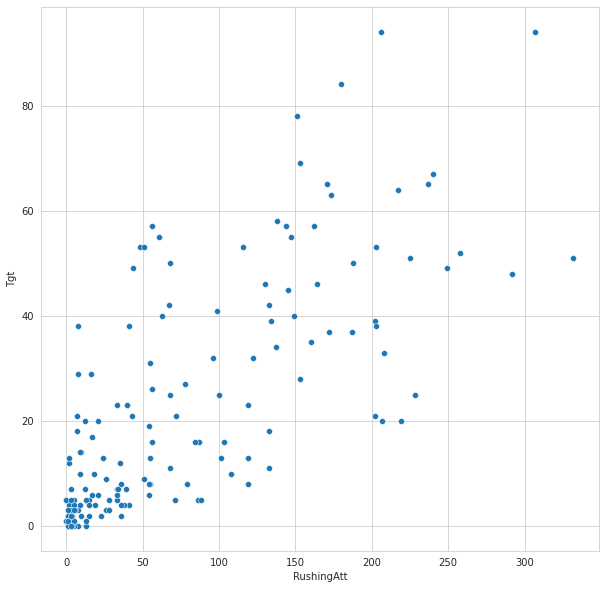

In [176]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style('whitegrid')

plt.figure(figsize=(10, 10))

sns.scatterplot(rb_df['RushingAtt'], rb_df['Tgt']);
#Added a semicolon to prevent text above Scatterplot from appearing upon chart generation.

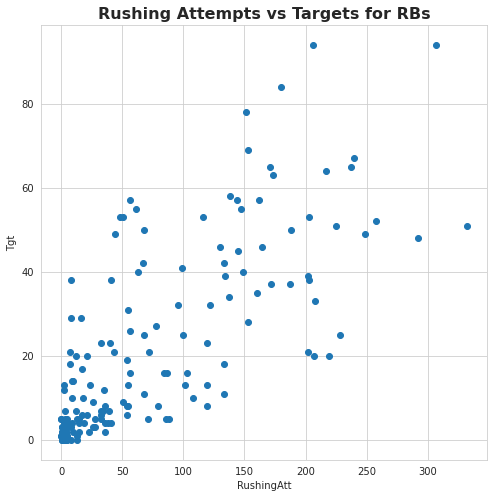

In [177]:
plt.figure(figsize=(8, 8))
plt.scatter(rb_df['RushingAtt'], rb_df['Tgt'])
#This will create the same chart, in matplotlib. The X-axis & Y-axis aren't automatically labeled in this chart as they are when using Seaborn.
#We will fix that by adding a few more lines of code.
plt.xlabel('RushingAtt')
plt.ylabel('Tgt')
plt.title('Rushing Attempts vs Targets for RBs', fontsize=16, fontweight='bold');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


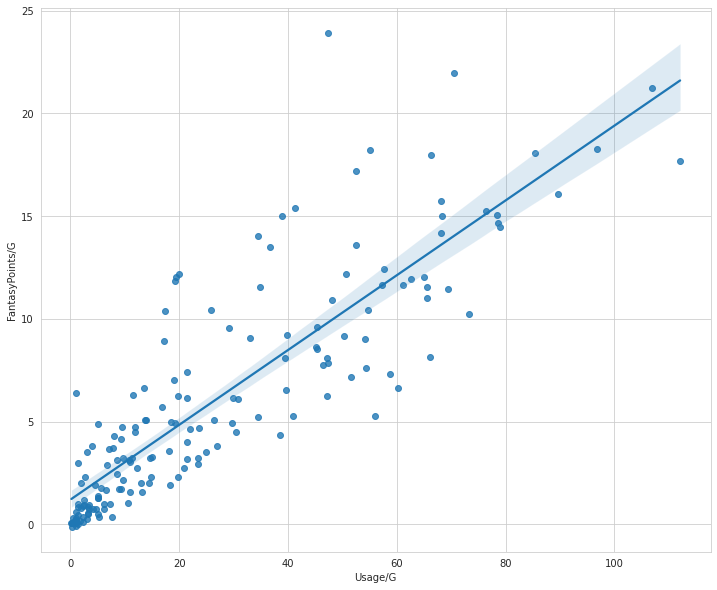

In [178]:
#Now we take a look at regression plots as a means to better visualize the linear relationship between two points. 
#In this instance, it's Usage-Per-Game and Fantasy-Points-Per-Game.

rb_df['Usage/G'] = rb_df['Tgt'] + rb_df['RushingAtt'] / rb_df['G']

plt.figure(figsize=(12, 10))

sns.regplot(rb_df['Usage/G'], rb_df['FantasyPoints/G']);

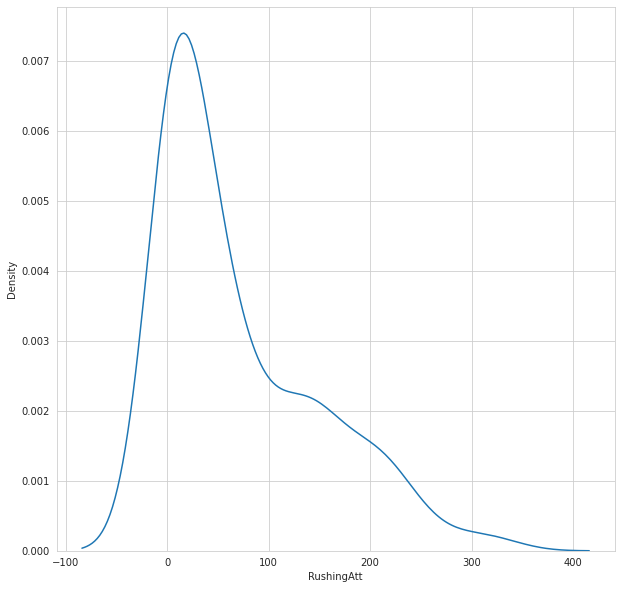

In [179]:
plt.figure(figsize=(10, 10))
sns.kdeplot(rb_df['RushingAtt'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


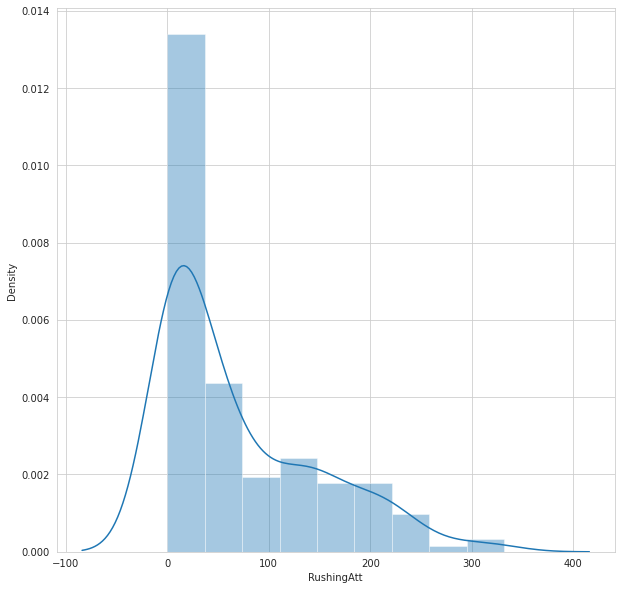

In [180]:
plt.figure(figsize=(10, 10))
sns.distplot(rb_df['RushingAtt'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


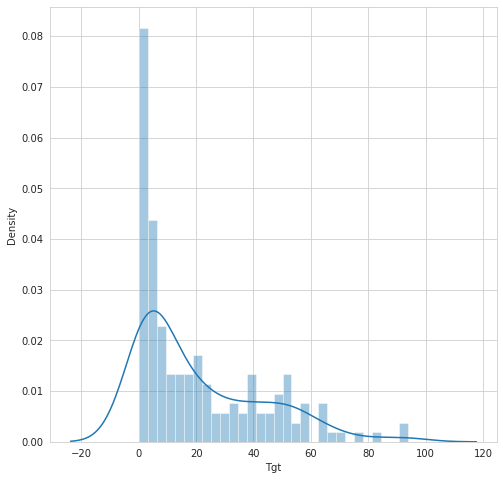

In [181]:
plt.figure(figsize=(8, 8))
sns.distplot(rb_df['Tgt'], bins=30);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


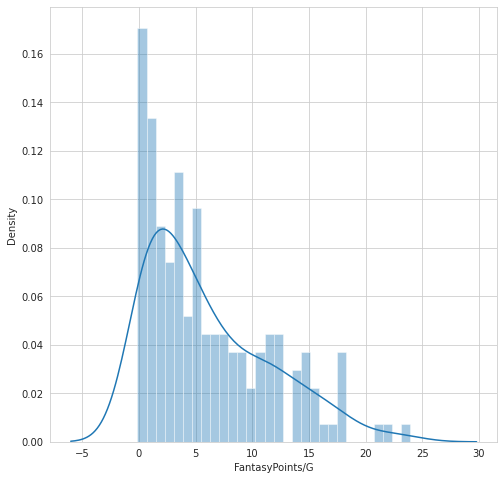

In [182]:
plt.figure(figsize=(8, 8))
sns.distplot(rb_df['FantasyPoints/G'], bins=30);

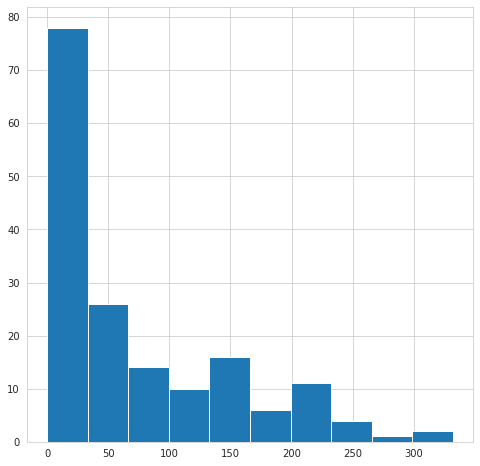

In [183]:
plt.figure(figsize=(8, 8))
plt.hist(rb_df['RushingAtt']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


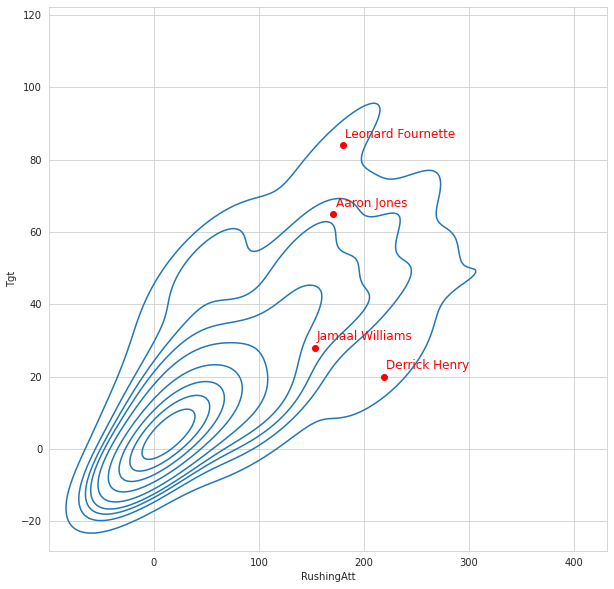

In [184]:
fig, ax = plt.subplots(figsize=(10, 10))

notable_players = ['Derrick Henry', 'Aaron Jones', 'Jamaal Williams', 'Leonard Fournette']

for player_name in notable_players:

  player = rb_df.loc[rb_df['Player'] == player_name]

  if not player.empty:
    targets = player['Tgt']
    rushes = player['RushingAtt']

    ax.annotate(player_name, xy=(rushes+2, targets+2), color='red', fontsize=12)
    ax.scatter(rushes, targets, color='red')


sns.kdeplot(rb_df['RushingAtt'], rb_df['Tgt']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x720 with 0 Axes>

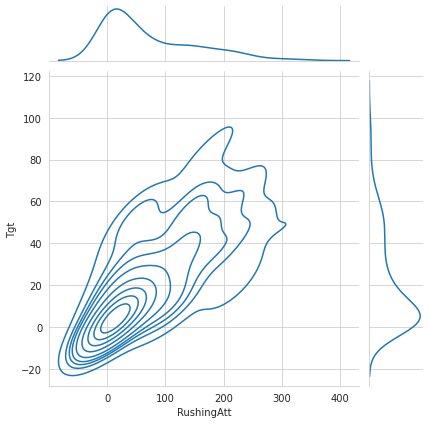

In [185]:
plt.figure(figsize=(10, 10))

sns.jointplot(rb_df['RushingAtt'], rb_df['Tgt'], kind='kde')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'FantasyPoints/G')

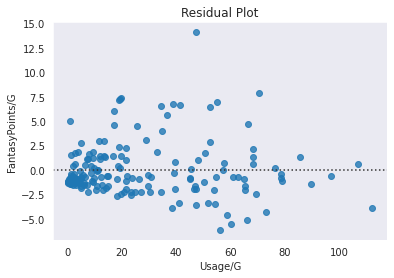

In [186]:
sns.set_style('dark')

sns.residplot(rb_df['Usage/G'], rb_df['FantasyPoints/G'])

plt.title('Residual Plot')
plt.xlabel('Usage/G')
plt.ylabel('FantasyPoints/G')

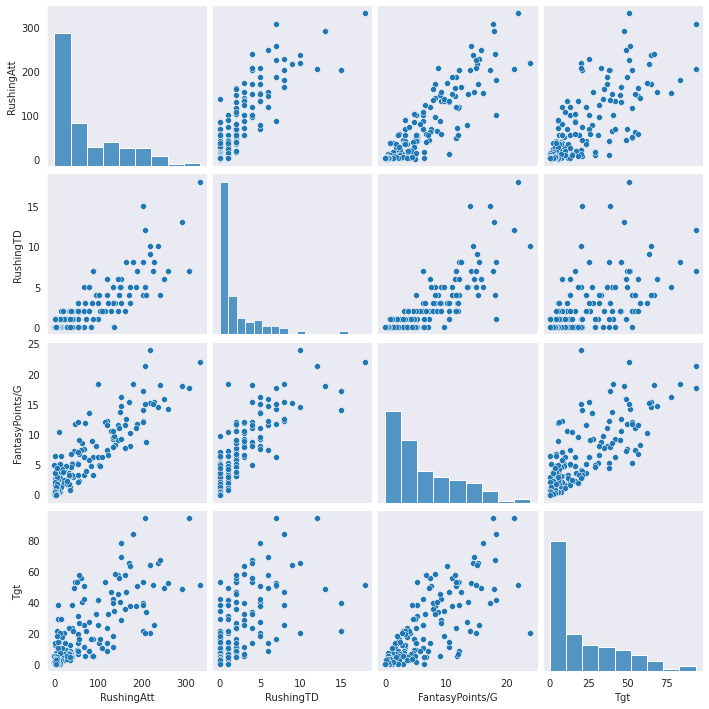

In [187]:
rb_df_copy = rb_df[[
    'RushingAtt', 'RushingTD', 'FantasyPoints/G', 'Tgt'
]]

sns.pairplot(rb_df_copy);

In [188]:
final_df = pd.DataFrame()

WEEKLY_BASE_URL = 'https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2022/07-Data%20Visualizations/01-Weekly%20Fantasy%20Stats%20-%202021/{week}.csv'

for week in range (1, 18):
  df = pd.read_csv(
      WEEKLY_BASE_URL.format(year=year, week=week)
  )

  df['Week'] = week

  final_df = pd.concat([final_df, df])

print(final_df.shape)
final_df.head()

(6800, 21)


,Unnamed: 0,Player,Pos,Tm,PassingYds,PassingTD,Int,PassingAtt,Cmp,RushingAtt,RushingYds,RushingTD,Rec,Tgt,ReceivingYds,ReceivingTD,FL,StandardFantasyPoints,PPRFantasyPoints,HalfPPRFantasyPoints,Week
0,0,Amari Cooper,WR,DAL,0,0,0,0,0,0,0,0,13,17,139,2,0,25.90,38.90,32.40,1
1,1,Tyreek Hill,WR,KAN,0,0,0,0,0,1,4,0,11,15,197,1,0,26.10,37.10,31.60,1
2,2,Patrick Mahomes,QB,KAN,337,3,0,36,27,5,18,1,0,0,0,0,0,33.28,33.28,33.28,1
3,3,Deebo Samuel,WR,SFO,0,0,0,0,0,0,0,0,9,12,189,1,1,22.90,31.90,27.40,1
4,4,Kyler Murray,QB,ARI,289,4,1,32,21,5,20,1,0,0,0,0,0,33.56,33.56,33.56,1


In [189]:
jackson = final_df.loc[final_df['Player'] == 'Lamar Jackson']
mahomes = final_df.loc[final_df['Player'] == 'Patrick Mahomes']
tua = final_df.loc[final_df['Player'] == 'Tua Tagovailoa']

tua

,Unnamed: 0,Player,Pos,Tm,PassingYds,PassingTD,Int,PassingAtt,Cmp,RushingAtt,RushingYds,RushingTD,Rec,Tgt,ReceivingYds,ReceivingTD,FL,StandardFantasyPoints,PPRFantasyPoints,HalfPPRFantasyPoints,Week
64,64,Tua Tagovailoa,QB,MIA,202,1,1,27,16,4,1,1,0,0,0,0,0,16.18,16.18,16.18,1
290,290,Tua Tagovailoa,QB,MIA,13,0,0,4,1,0,0,0,0,0,0,0,0,0.52,0.52,0.52,2
17,17,Tua Tagovailoa,QB,MIA,329,2,1,47,33,3,22,0,0,0,0,0,0,21.36,21.36,21.36,6
7,7,Tua Tagovailoa,QB,MIA,291,4,2,40,32,4,29,0,0,0,0,0,0,26.54,26.54,26.54,7
51,51,Tua Tagovailoa,QB,MIA,205,0,1,39,21,4,10,1,0,0,0,0,0,13.20,13.20,13.20,8
74,74,Tua Tagovailoa,QB,MIA,158,0,0,13,8,3,0,1,0,0,0,0,0,12.32,12.32,12.32,10
43,43,Tua Tagovailoa,QB,MIA,273,2,1,33,27,3,6,0,0,0,0,0,0,17.52,17.52,17.52,11
75,75,Tua Tagovailoa,QB,MIA,230,1,0,31,27,4,0,0,0,0,0,0,0,13.20,13.20,13.20,12
47,47,Tua Tagovailoa,QB,MIA,244,2,0,41,30,2,1,0,0,0,0,0,0,17.86,17.86,17.86,13
43,43,Tua Tagovailoa,QB,MIA,196,2,2,27,16,7,19,0,0,0,0,0,0,13.74,13.74,13.74,15


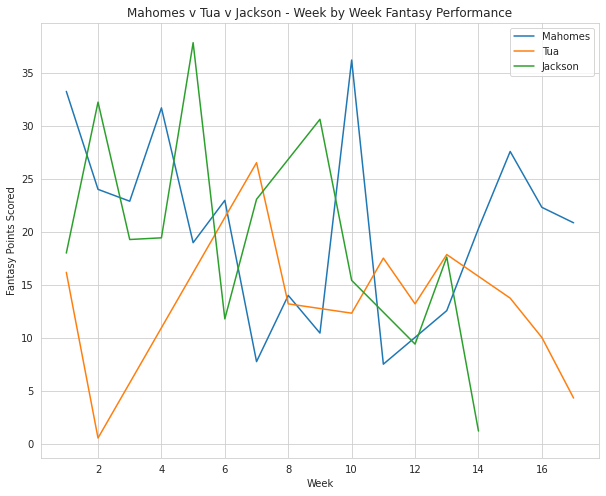

In [190]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.plot(mahomes['Week'], mahomes['PPRFantasyPoints'])
plt.plot(tua['Week'], tua['PPRFantasyPoints'])
plt.plot(jackson['Week'], jackson['PPRFantasyPoints'])
plt.legend(['Mahomes', 'Tua', 'Jackson'])
plt.xlabel('Week')
plt.ylabel('Fantasy Points Scored')
plt.title('Mahomes v Tua v Jackson - Week by Week Fantasy Performance');

#Had to tinker with the code here a bit as the first iteration only showed a straight line for each player. No error was present in the code,
#so this seemed to be an issue with the source csv. Replaced the listed week in the source csv with {week} and the chart appeared as intially expected.

In [191]:
jackson.corr() [['PPRFantasyPoints']]

,PPRFantasyPoints
Unnamed: 0,-0.816391
PassingYds,0.833761
PassingTD,0.785419
Int,-0.116977
PassingAtt,0.607503
Cmp,0.694325
RushingAtt,0.628664
RushingYds,0.664977
RushingTD,0.386755
Rec,NaN


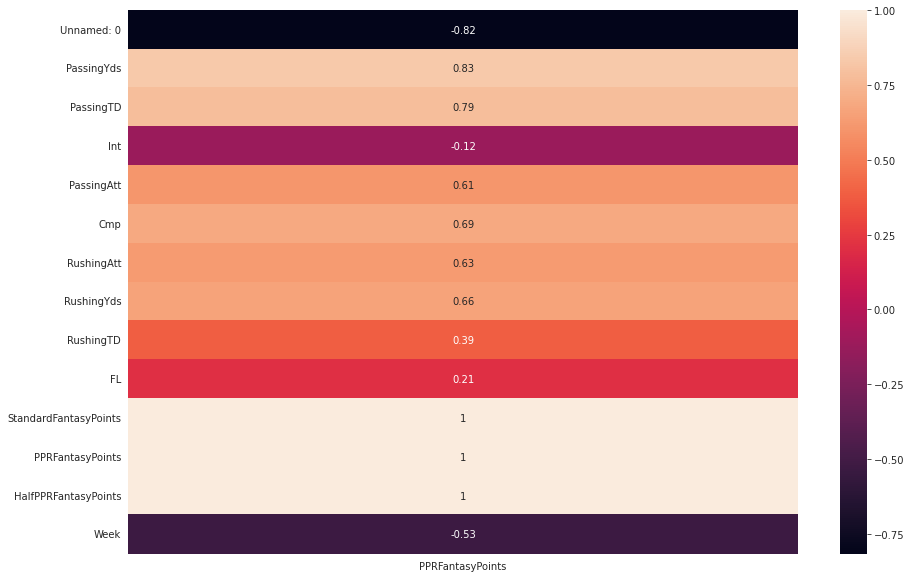

In [192]:
import numpy as np
plt.figure(figsize=(15, 10))
jackson = jackson.drop(['Rec', 'Tgt', 'ReceivingYds', 'ReceivingTD'], axis=1)
sns.heatmap(jackson.corr()[['PPRFantasyPoints']], annot=True);

In [200]:
COMBINE_URL = 'https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2022/07-Data%20Visualizations/02-Combine%20Data%202000%20to%202020.csv'

combine_df = pd.read_csv(COMBINE_URL).iloc[:, 2:]

combine_df.head()

,Rk,Year,Player,Pos,Age,AV,School,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr)
0,1,2000,Bashir Yamini,WR,22.0,0,Iowa,6-3,191,4.53,33.0,NaN,130.0,7.09,4.18,NaN
1,2,2000,James Williams,WR,22.0,4,Marshall,5-11,180,4.59,36.0,NaN,123.0,7.22,4.16,Seattle Seahawks / 6th / 175th pick / 2000
2,3,2000,Dez White,WR,20.0,19,Georgia Tech,6-1,218,4.62,37.5,NaN,124.0,6.91,4.09,Chicago Bears / 3rd / 69th pick / 2000
3,4,2000,Peter Warrick,WR,22.0,30,Florida State,5-11,194,4.58,NaN,NaN,NaN,NaN,NaN,Cincinnati Bengals / 1st / 4th pick / 2000
4,5,2000,Troy Walters,WR,23.0,13,Stanford,5-6,171,4.55,32.5,NaN,106.0,6.61,3.84,Minnesota Vikings / 5th / 165th pick / 2000


In [203]:
combine_df.groupby('Pos')['40YD'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
QB,209.0,4.813445,0.176743,4.33,4.71,4.82,4.91,5.37
RB,414.0,4.536739,0.102188,4.24,4.46,4.54,4.60,4.84
TE,268.0,4.755784,0.137573,4.37,4.66,4.77,4.84,5.06
WR,612.0,4.493513,0.097411,4.22,4.42,4.50,4.56,4.79


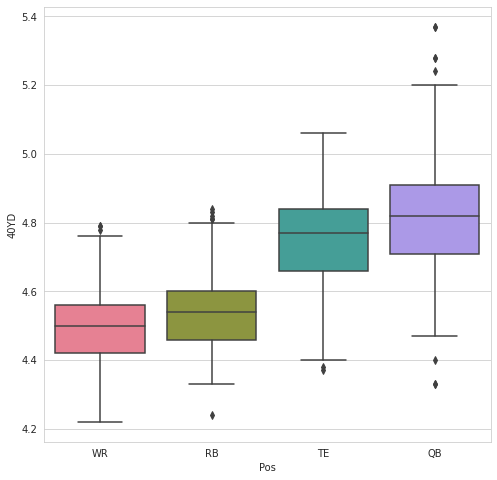

In [206]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='Pos', y='40YD', data=combine_df, palette=sns.color_palette('husl', n_colors=4));